In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1)

# Loading the Datasets

In [126]:
taxi=pd.read_csv(r'F:\mohamed\3rd year\semester 2\machine learning\project\milestone 1\taxi\taxi-rides.csv')
weather=pd.read_csv(r'F:\mohamed\3rd year\semester 2\machine learning\project\milestone 1\taxi\weather.csv')

## start with Data cleaning

In [127]:
taxi.head()

,distance,cab_type,time_stamp,destination,source,surge_multiplier,id,product_id,name,price
0,0.62,Uber,1.544770e+12,West End,Haymarket Square,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN
1,2.27,Uber,1.543400e+12,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0
2,2.00,Lyft,1.544920e+12,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,10.5
3,3.98,Lyft,1.543620e+12,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,22.5
4,1.49,Lyft,1.543580e+12,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,7.0


In [128]:
taxi.describe()

,distance,time_stamp,surge_multiplier,price
count,554456.000000,5.544560e+05,554456.000000,510321.000000
mean,2.189834,1.544046e+12,1.013946,16.545307
std,1.139779,6.892123e+08,0.091999,9.322049
min,0.020000,1.543200e+12,1.000000,2.500000
25%,1.270000,1.543440e+12,1.000000,9.000000
50%,2.160000,1.543740e+12,1.000000,13.500000
75%,2.930000,1.544830e+12,1.000000,22.500000
max,7.860000,1.545160e+12,3.000000,97.500000


In [129]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554456 entries, 0 to 554455
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          554456 non-null  float64
 1   cab_type          554456 non-null  object 
 2   time_stamp        554456 non-null  float64
 3   destination       554456 non-null  object 
 4   source            554456 non-null  object 
 5   surge_multiplier  554456 non-null  float64
 6   id                554456 non-null  object 
 7   product_id        554456 non-null  object 
 8   name              554456 non-null  object 
 9   price             510321 non-null  float64
dtypes: float64(4), object(6)
memory usage: 42.3+ MB


In [130]:
taxi.shape

(554456, 10)

# investigate and find missing data

In [131]:
taxi.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
surge_multiplier        0
id                      0
product_id              0
name                    0
price               44135
dtype: int64

In [132]:
print(' percentage of missing price values  = {}'.format((taxi['price'].isnull().sum()/len(taxi))*100))


 percentage of missing price values  = 7.96005453994546


## since `price` is our target so we will drop the rows containing missing values

In [133]:
taxi.dropna(inplace=True)
taxi.isnull().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
surge_multiplier    0
id                  0
product_id          0
name                0
price               0
dtype: int64

# investigate and find Duplicated data

In [134]:
taxi.duplicated().sum()

0

# Detecting outliers

In [135]:
taxi.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source',
       'surge_multiplier', 'id', 'product_id', 'name', 'price'],
      dtype='object')

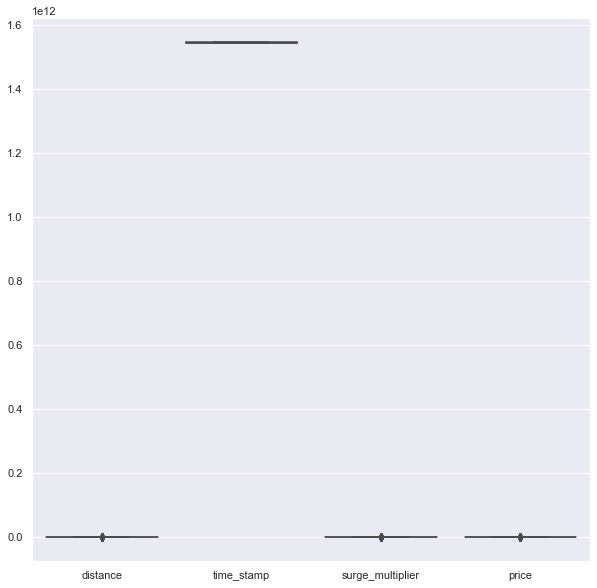

In [136]:
sns.boxplot(data=taxi)
plt.show()

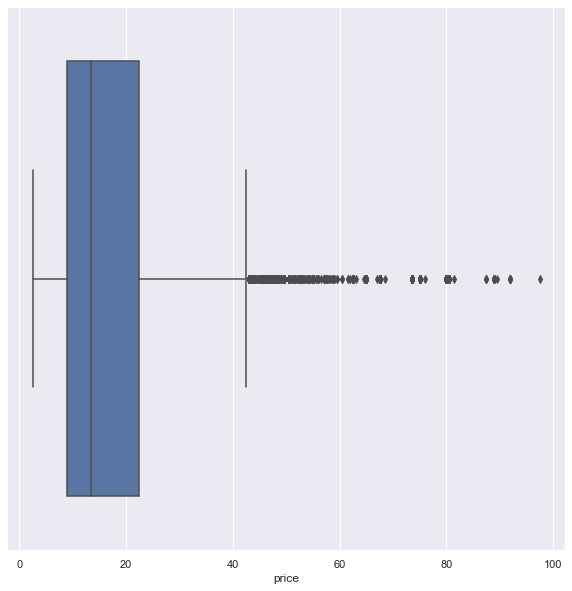

In [137]:
sns.boxplot(x=taxi['price'])
plt.show()

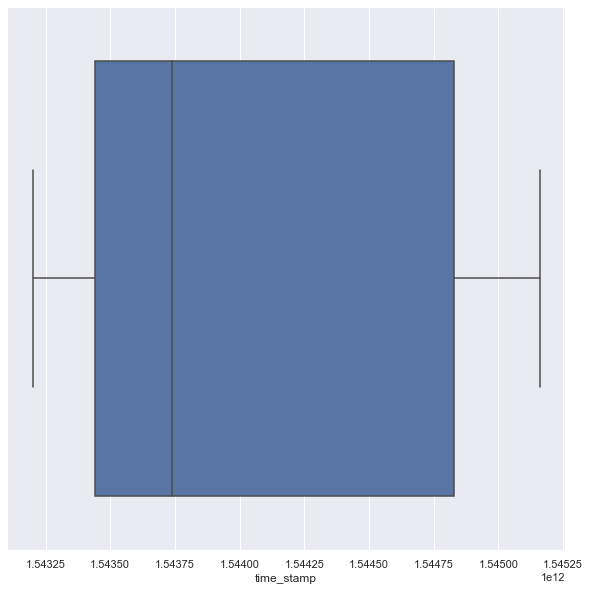

In [138]:
sns.boxplot(x=taxi['time_stamp'])
plt.show()

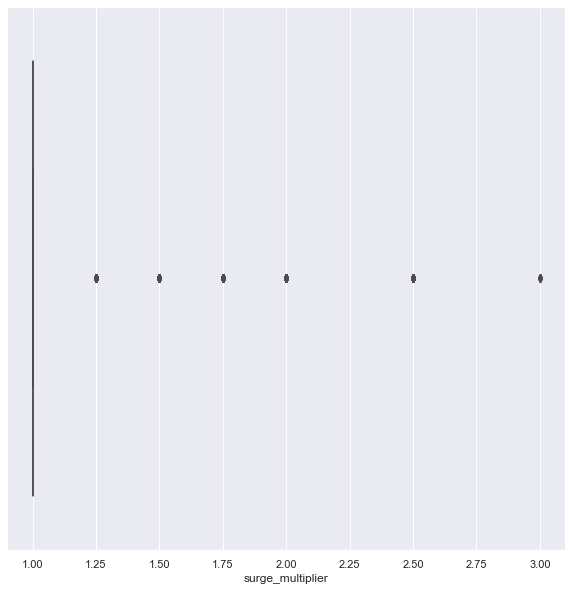

In [139]:
sns.boxplot(x=taxi['surge_multiplier'])
plt.show()

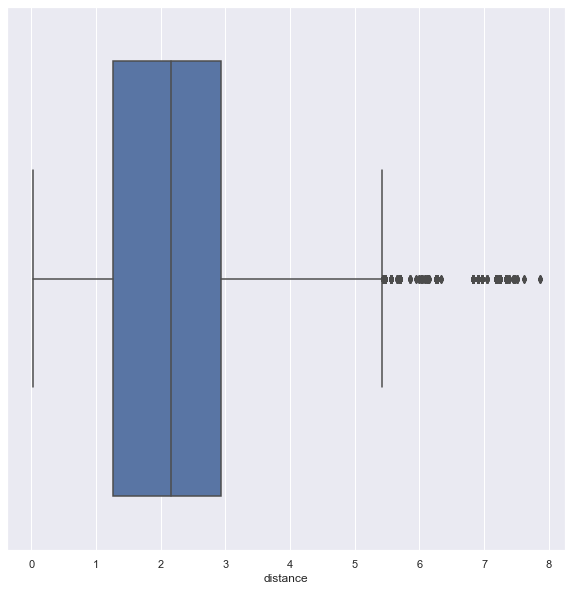

In [140]:
sns.boxplot(x=taxi['distance'])
plt.show()

# remove_outliers using `IQR` method

In [141]:
def remove_outliers(df,columns):
    for col in columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        upper_limit=Q3+1.5*IQR
        lower_limit=Q1-1.5*IQR
        # outlires are below lower limit and above upper limit
        outliers = ( ( df[col] < lower_limit) | (df[col] > upper_limit) )
        indecies=df[outliers].index
        print('number of outliers in {} is : {}'.format(col,len(indecies)))
        df.drop(indecies,inplace=True)

In [142]:
columns={'distance','surge_multiplier','price'}
remove_outliers(taxi,columns)


number of outliers in surge_multiplier is : 16851
number of outliers in distance is : 5555
number of outliers in price is : 1454


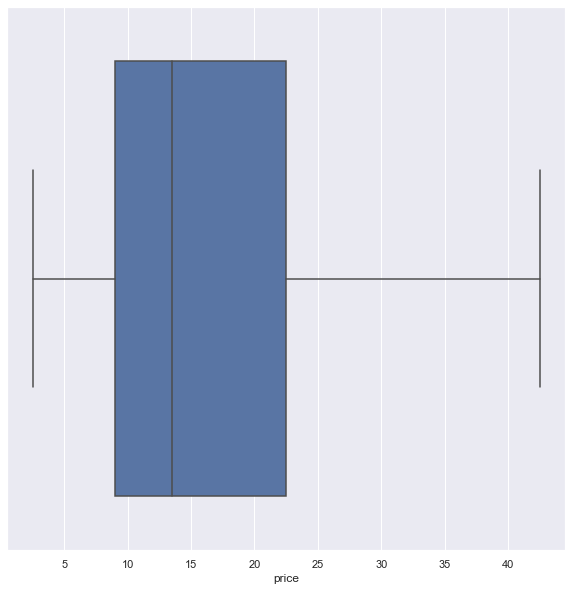

In [143]:
sns.boxplot(x=taxi['price'])
plt.show()

In [144]:
taxi.shape

(486461, 10)

In [145]:
taxi.head()

,distance,cab_type,time_stamp,destination,source,surge_multiplier,id,product_id,name,price
1,2.27,Uber,1.543400e+12,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0
2,2.00,Lyft,1.544920e+12,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,10.5
3,3.98,Lyft,1.543620e+12,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,22.5
4,1.49,Lyft,1.543580e+12,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,7.0
5,1.97,Uber,1.543460e+12,Northeastern University,Beacon Hill,1.0,8ca92e07-e4b9-4191-a212-9098c5fed50a,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,29.5


In [146]:
taxi['id'].value_counts()

b24b297e-3c4c-4f20-9737-88742ce3c070    1
4a3be9f7-100f-4289-a3af-6599757d19e6    1
a25e731d-4408-4cbe-b34c-84202e0c3377    1
e38aec84-5f04-442e-97f0-6f08f97e27d4    1
2c2521e5-35a2-4908-a0b5-d034fd051941    1
                                       ..
6d5e0439-6588-4711-929b-9e0be1a3f9a4    1
0d24a042-39c6-43ae-931b-8d3f81eafc10    1
6c73ee5b-80ac-46b4-adfb-06df9efed92e    1
7dd74350-b553-449c-b02f-c21b1bd2ffd6    1
776ff333-4a31-45b6-83c3-a6d3ddc2d667    1
Name: id, Length: 486461, dtype: int64

# we will drop this `id` feature due it doesn't provide any important information


In [147]:
taxi.drop(['id'],axis=1,inplace=True)
taxi.head()

,distance,cab_type,time_stamp,destination,source,surge_multiplier,product_id,name,price
1,2.27,Uber,1.543400e+12,Boston University,Beacon Hill,1.0,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0
2,2.00,Lyft,1.544920e+12,Back Bay,Haymarket Square,1.0,lyft,Lyft,10.5
3,3.98,Lyft,1.543620e+12,Financial District,Northeastern University,1.0,lyft_plus,Lyft XL,22.5
4,1.49,Lyft,1.543580e+12,Back Bay,Northeastern University,1.0,lyft,Lyft,7.0
5,1.97,Uber,1.543460e+12,Northeastern University,Beacon Hill,1.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,29.5


In [148]:
taxi['destination'].value_counts()

Back Bay                   41177
West End                   41151
Financial District         40999
Haymarket Square           40984
Beacon Hill                40976
North End                  40949
North Station              40893
Theatre District           40858
Fenway                     40761
South Station              40280
Northeastern University    39994
Boston University          37439
Name: destination, dtype: int64

In [149]:
taxi['source'].value_counts()

North End                  42349
Haymarket Square           42041
North Station              41587
West End                   41464
South Station              41238
Beacon Hill                40474
Theatre District           40380
Boston University          40249
Fenway                     40105
Northeastern University    40072
Back Bay                   39039
Financial District         37463
Name: source, dtype: int64

In [150]:
taxi['name'].value_counts()

UberX           43373
UberPool        43266
WAV             43176
Black           43141
UberXL          43121
Black SUV       42736
Shared          40743
Lyft XL         37665
Lux Black       37610
Lyft            37545
Lux             37526
Lux Black XL    36559
Name: name, dtype: int64

In [151]:
taxi['product_id'].value_counts()

55c66225-fbe7-4fd5-9072-eab1ece5e23e    43373
997acbb5-e102-41e1-b155-9df7de0a73f2    43266
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    43176
6c84fd89-3f11-4782-9b50-97c468b19529    43141
6f72dfc5-27f1-42e8-84db-ccc7a75f6969    43121
6d318bcc-22a3-4af6-bddd-b409bfce1546    42736
lyft_line                               40743
lyft_plus                               37665
lyft_lux                                37610
lyft                                    37545
lyft_premier                            37526
lyft_luxsuv                             36559
Name: product_id, dtype: int64

taxi=pd.get_dummies(data=taxi,columns=['destination','source','name','product_id'])

In [152]:
taxi.head()

,distance,cab_type,time_stamp,destination,source,surge_multiplier,product_id,name,price
1,2.27,Uber,1.543400e+12,Boston University,Beacon Hill,1.0,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0
2,2.00,Lyft,1.544920e+12,Back Bay,Haymarket Square,1.0,lyft,Lyft,10.5
3,3.98,Lyft,1.543620e+12,Financial District,Northeastern University,1.0,lyft_plus,Lyft XL,22.5
4,1.49,Lyft,1.543580e+12,Back Bay,Northeastern University,1.0,lyft,Lyft,7.0
5,1.97,Uber,1.543460e+12,Northeastern University,Beacon Hill,1.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,29.5


## we will continue working on the left nominal features only after mergeing the 2 data sets

***

# now let's move to work on weather data

In [153]:
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [154]:
weather.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,0.100758,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000


In [155]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


In [156]:
weather.shape

(6276, 8)

In [157]:
weather.isnull().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [158]:
print(' percentage of missing rain values  = {}'.format((weather['rain'].isnull().sum()/len(weather))*100))


 percentage of missing rain values  = 85.75525812619503


## percentage of missing rain values is about 85% so we will drop rain column 

In [159]:
weather.drop(['rain'],axis=1,inplace=True)

In [160]:
weather.isnull().sum()

temp          0
location      0
clouds        0
pressure      0
time_stamp    0
humidity      0
wind          0
dtype: int64

# find duplicate data

In [161]:
weather.duplicated().sum()

0

# Detecting outliers

In [162]:
weather.columns

Index(['temp', 'location', 'clouds', 'pressure', 'time_stamp', 'humidity',
       'wind'],
      dtype='object')

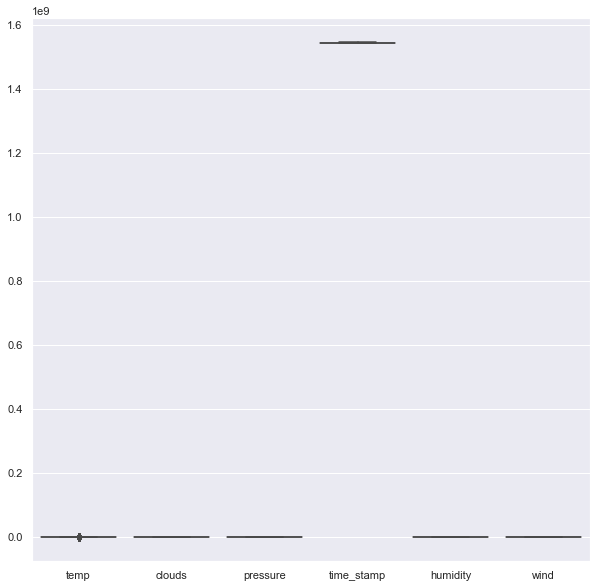

In [163]:
sns.boxplot(data=weather)
plt.show()

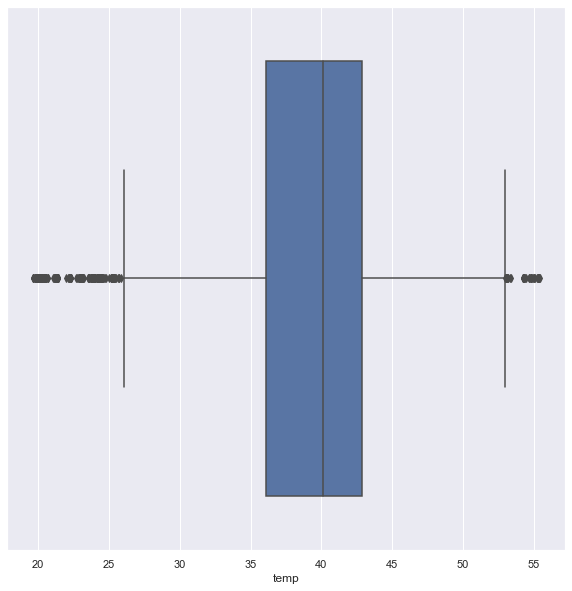

In [164]:
sns.boxplot(x=weather['temp'])
plt.show()

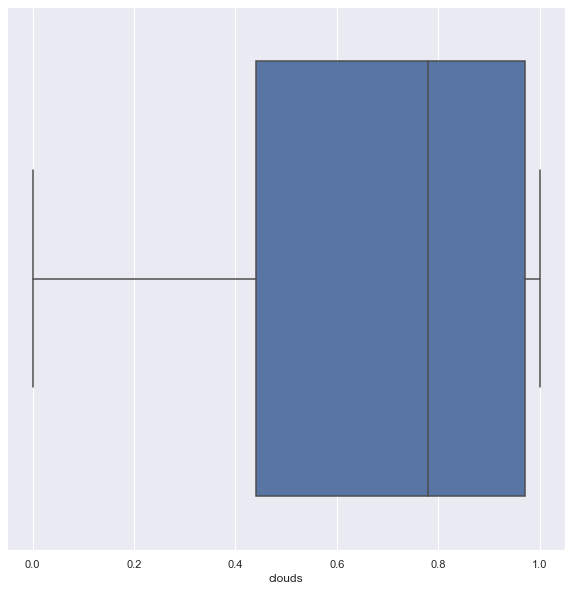

In [165]:
sns.boxplot(x=weather['clouds'])
plt.show()

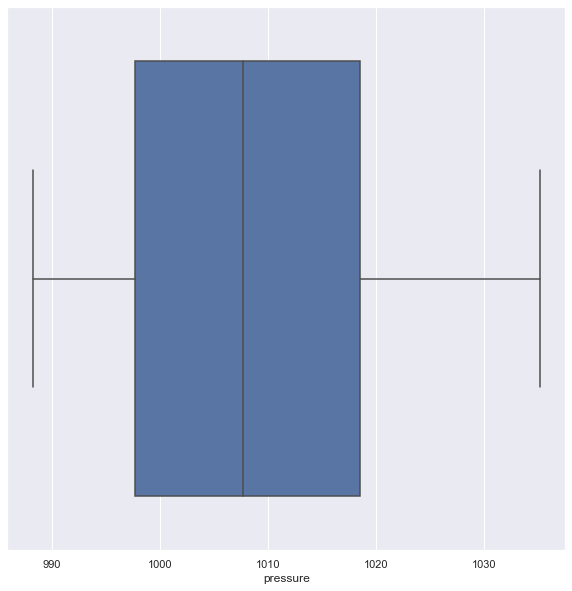

In [166]:
sns.boxplot(x=weather['pressure'])
plt.show()

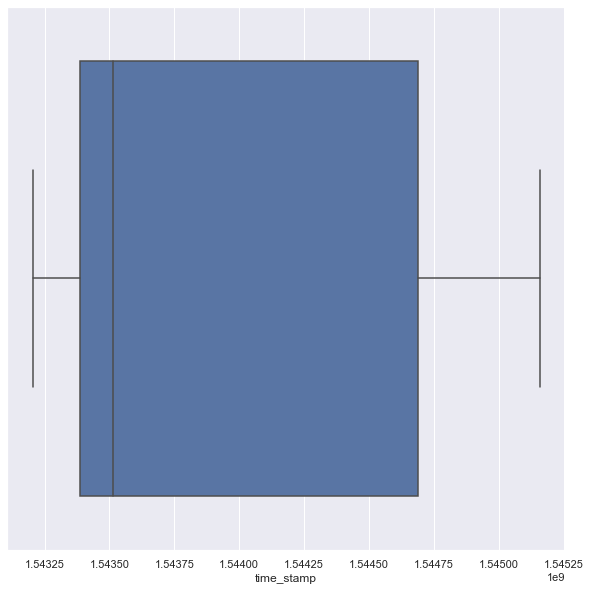

In [167]:
sns.boxplot(x=weather['time_stamp'])
plt.show()

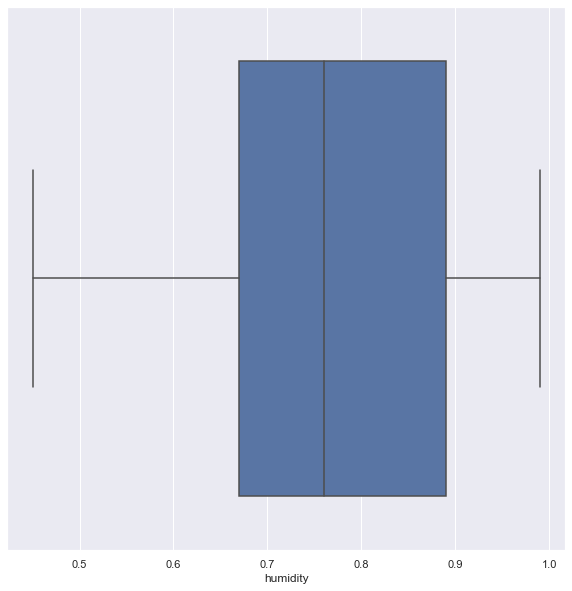

In [168]:
sns.boxplot(x=weather['humidity'])
plt.show()

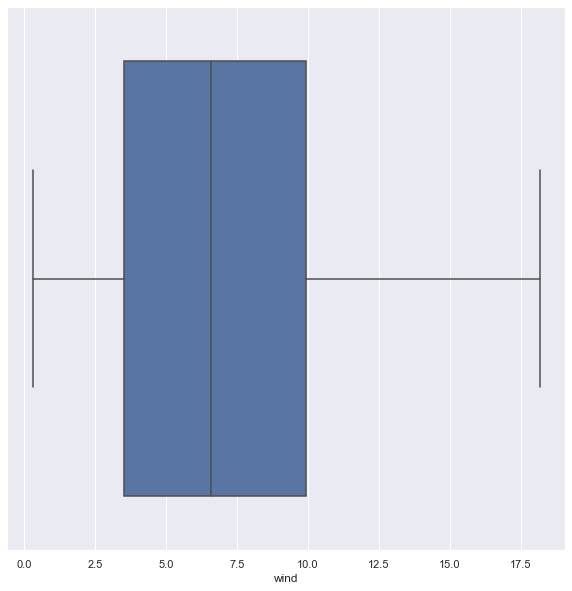

In [169]:
sns.boxplot(x=weather['wind'])
plt.show()

## there are clear outliers on temp column so let's remove it

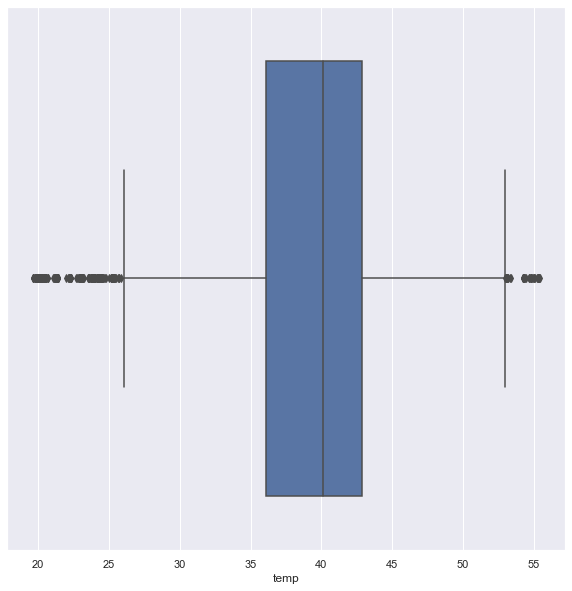

In [170]:
sns.boxplot(x=weather['temp'])
plt.show()

## - After I have removed these outliers using `IQR` method ,the boxplot still contains other outliers
- That's mean that we have a `non-normal` distribution data, so we will use `median absolute deviation` method that can treat with such problem

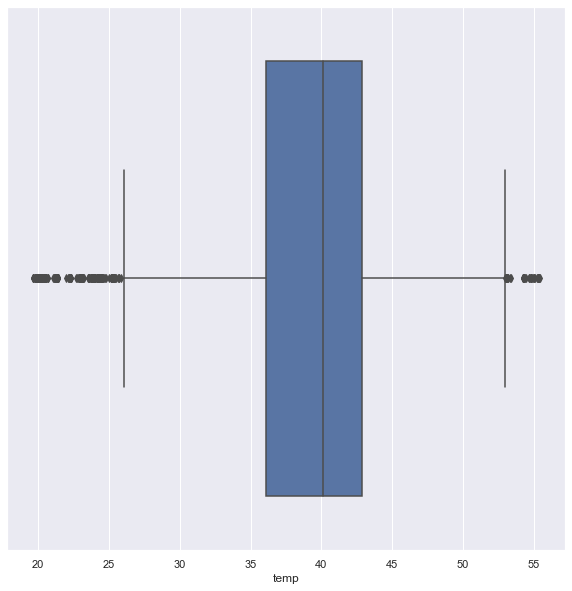

number of outliers in temp is : 401


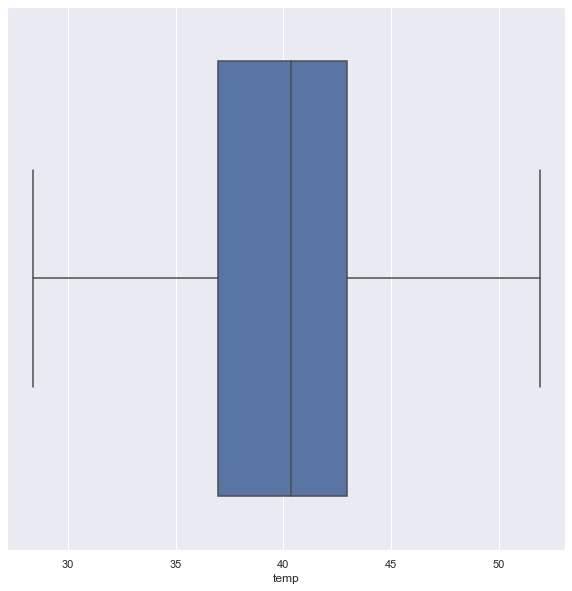

In [171]:
def MAD(df,col,thresh_hold):
    sns.boxplot(x=df[col])
    plt.show()
    from scipy import stats
    med = float(np.median(df[col], axis = 0))
    mad = (stats.median_absolute_deviation(df[col]))
    outlier = []
    for i, v in enumerate(df[col]):
        t = (v-med)/mad
        if t > thresh_hold or t<-thresh_hold:
            outlier.append(i)
        else:
            continue
    print('number of outliers in {} is : {}'.format( col,len(outlier)))

    d=df.drop(outlier)
    sns.boxplot(x=d[col])
    plt.show()
    return d

weath=MAD(weather,'temp',thresh_hold=2.3)

In [172]:
weath.head()

,temp,location,clouds,pressure,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,1545003901,0.75,11.49


In [173]:
weath.shape

(5875, 7)

In [174]:
taxi['destination'].unique().sort()==weath['location'].unique().sort()

True

In [175]:
weath['location'].value_counts()

Haymarket Square           492
Back Bay                   491
North End                  491
Beacon Hill                490
North Station              490
Boston University          490
West End                   489
Fenway                     489
Northeastern University    489
Theatre District           488
Financial District         488
South Station              488
Name: location, dtype: int64

weath=pd.get_dummies(data=weath,columns=['location'])

# Let's merge our data

In [176]:
print('weather shape:{}'.format(weath.shape))
print('Taxi shape:{}'.format(taxi.shape))

weather shape:(5875, 7)
Taxi shape:(486461, 9)


In [177]:
data=taxi.copy()
data2=weath.copy()

In [178]:
from datetime import datetime
data['time_stamp'] = data['time_stamp'].astype(str)
data2['time_stamp'] = data2['time_stamp'].astype(str)
data['time_stamp'] = data['time_stamp'].str[:7]
data2['time_stamp'] = data2['time_stamp'].str[:7]
data.head(5)

,distance,cab_type,time_stamp,destination,source,surge_multiplier,product_id,name,price
1,2.27,Uber,1543400,Boston University,Beacon Hill,1.0,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0
2,2.00,Lyft,1544920,Back Bay,Haymarket Square,1.0,lyft,Lyft,10.5
3,3.98,Lyft,1543620,Financial District,Northeastern University,1.0,lyft_plus,Lyft XL,22.5
4,1.49,Lyft,1543580,Back Bay,Northeastern University,1.0,lyft,Lyft,7.0
5,1.97,Uber,1543460,Northeastern University,Beacon Hill,1.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,29.5


In [179]:
data2.rename(columns={'location':'destination'},inplace=True)
data2.head(5)

,temp,destination,clouds,pressure,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,1545003,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,1545003,0.76,11.32
2,42.50,Boston University,1.0,1012.15,1545003,0.76,11.07
3,42.11,Fenway,1.0,1012.13,1545003,0.77,11.09
4,43.13,Financial District,1.0,1012.14,1545003,0.75,11.49


In [180]:
mergedf = data2.merge(data, how='inner')
mergedf.shape

(185681, 14)

In [181]:
mergedf.drop_duplicates(inplace=True)

In [186]:
mergedf.duplicated().sum() == 0
mergedf.shape

(150018, 14)

In [187]:
data=mergedf.copy()

In [188]:
data.head()

,temp,destination,clouds,pressure,time_stamp,humidity,wind,distance,cab_type,source,surge_multiplier,product_id,name,price
0,45.52,South Station,0.89,1000.08,1543830,0.95,1.39,2.39,Lyft,Beacon Hill,1.0,lyft_plus,Lyft XL,16.5
1,45.52,South Station,0.89,1000.08,1543830,0.95,1.39,0.55,Uber,Theatre District,1.0,6c84fd89-3f11-4782-9b50-97c468b19529,Black,15.5
2,45.52,South Station,0.89,1000.08,1543830,0.95,1.39,0.44,Lyft,Financial District,1.0,lyft_lux,Lux Black,16.5
3,45.52,South Station,0.89,1000.08,1543830,0.95,1.39,2.17,Uber,North Station,1.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,14.0
4,45.52,South Station,0.89,1000.08,1543830,0.95,1.39,2.14,Uber,West End,1.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,8.5


# Applying some Exploratory Data Analysis and Visualization

## Distances


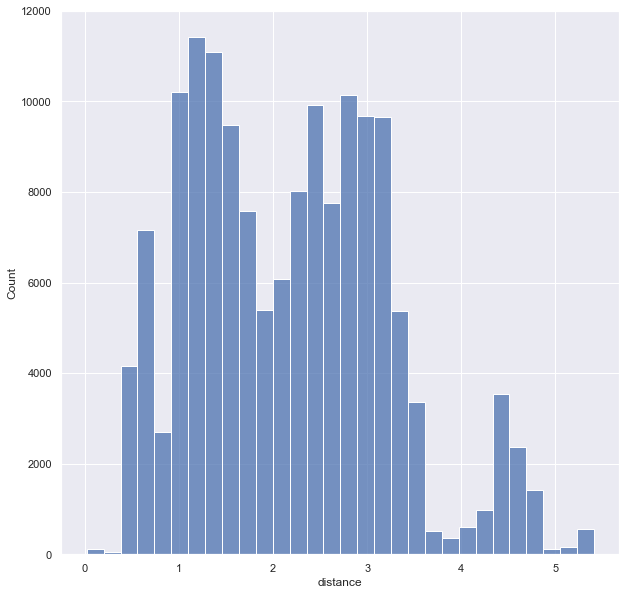

In [189]:
sns.histplot(data=data['distance'],kde=False,bins=30)
plt.show()

## number of cab_type with respect to sources and destinations of the travels

<AxesSubplot:xlabel='cab_type,source'>

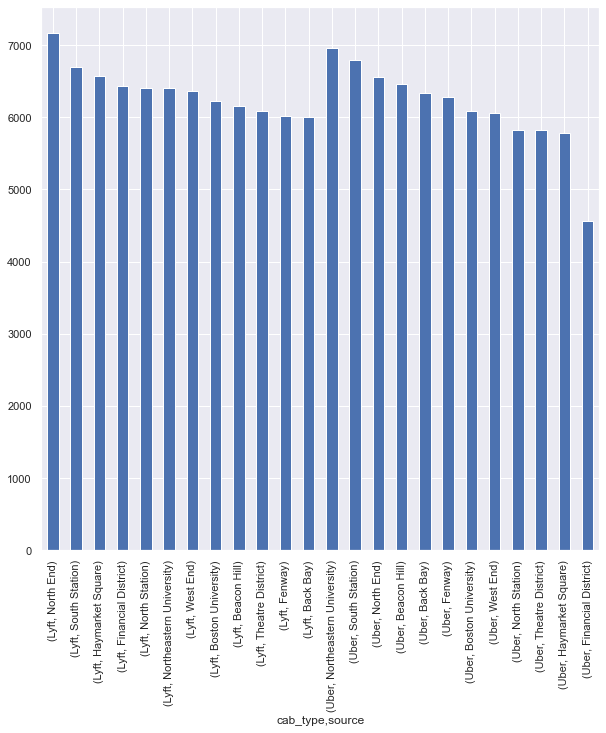

In [190]:
data.groupby(['cab_type'])['source'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='cab_type,destination'>

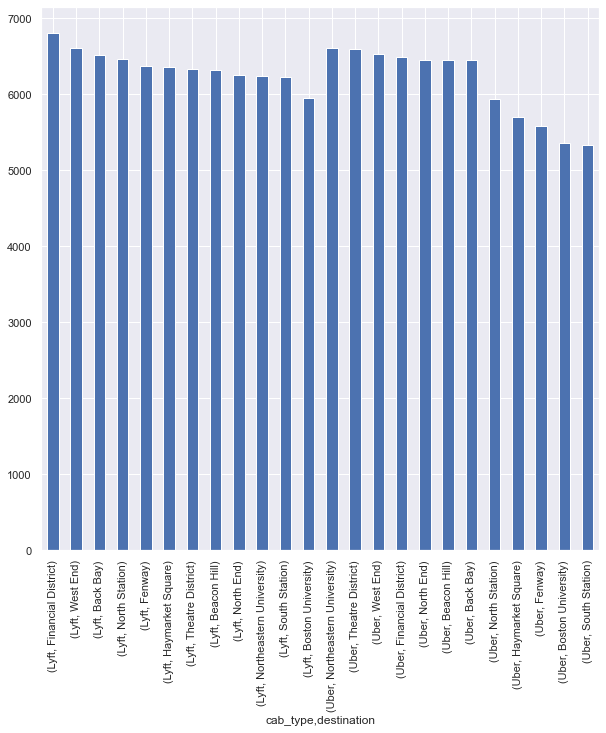

In [191]:
data.groupby(['cab_type'])['destination'].value_counts().plot(kind='bar')

## overall outcome for each cab_type

In [192]:
data.groupby('cab_type')['price'].sum()

cab_type
Lyft    1265929.08
Uber    1177619.00
Name: price, dtype: float64

### overall surge_multiplier for each cab_type


In [193]:
data.groupby('cab_type')['surge_multiplier'].sum()

cab_type
Lyft    76507.0
Uber    73511.0
Name: surge_multiplier, dtype: float64

## know overall distances to specific destinations 


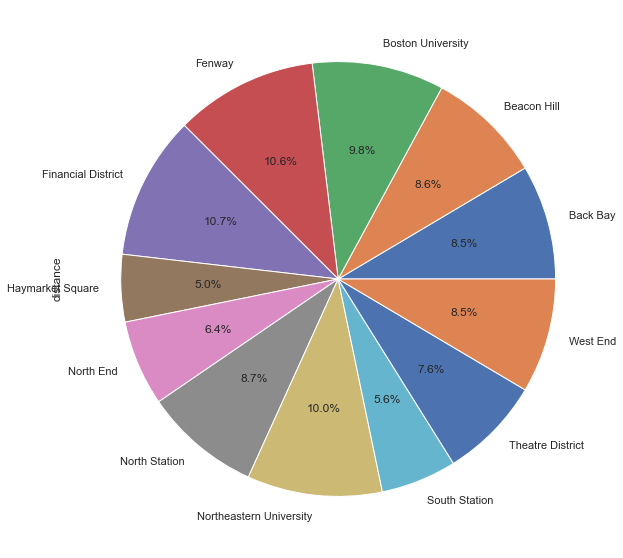

In [194]:
data.groupby('destination')['distance'].sum().plot.pie(autopct="%.1f%%");
plt.show()

In [195]:
sns.pairplot(data=data,kind='reg')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001DD16B505E0> (for post_execute):


KeyboardInterrupt: 

## This plot can help us in feature selection , as we can conclude and choose  good features upon the tendency and `correlaton` between each `feature` and the `target` and the other `features` and that's clear in the plot

<AxesSubplot:xlabel='distance', ylabel='price'>

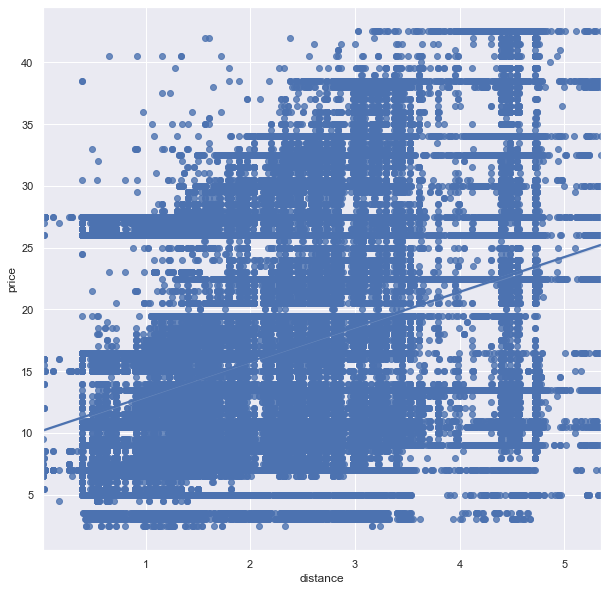

In [195]:
sns.regplot(x='distance',y='price',data=data)

## there is a clear correlation 


# let's apply feature selection 

,temp,clouds,pressure,humidity,wind,distance,surge_multiplier,price
temp,1.000000,0.438128,-0.145154,0.283373,0.141755,-0.005450,NaN,-0.001936
clouds,0.438128,1.000000,0.053192,0.601218,-0.017268,-0.003082,NaN,-0.000817
pressure,-0.145154,0.053192,1.000000,-0.046885,-0.469019,-0.008371,NaN,-0.007048
humidity,0.283373,0.601218,-0.046885,1.000000,-0.107081,-0.000762,NaN,-0.004229
wind,0.141755,-0.017268,-0.469019,-0.107081,1.000000,0.000772,NaN,0.004689
distance,-0.005450,-0.003082,-0.008371,-0.000762,0.000772,1.000000,NaN,0.335641
surge_multiplier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,-0.001936,-0.000817,-0.007048,-0.004229,0.004689,0.335641,NaN,1.000000


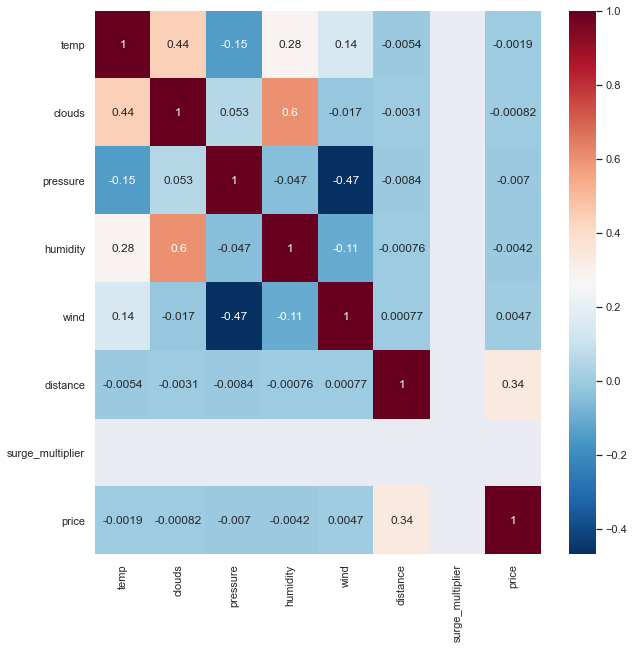

In [196]:
sns.heatmap(data.corr(),annot=True,cmap='RdBu_r')
data.corr()

### we will drop  `surge_multiplier` since it has no correlation with any other feature


In [197]:
data.drop(['surge_multiplier'],axis=1,inplace=True)


- we will drop `temp` and keep `humidity` ,since one of them is redundunt due to high correlation between.
- and because `humidity` has higher coorrelation with the target

In [198]:
data.drop(['temp'],axis=1,inplace=True)#

ans so
- we will drop `wind` and keep `pressure` ,since one of them is redundunt due to high correlation between.
- and because `pressure` has higher coorrelation with the target


In [199]:
data.drop(['wind'],axis=1,inplace=True)#

ans so
- we will drop `pressure` and keep `humidity` ,since one of them is redundunt due to high correlation between.
- and because `humidity` has higher coorrelation with the target


data.drop(['humidity'],axis=1,inplace=True)

ans so
- we will drop `clouds` and keep `humidity` ,since one of them is redundunt due to high correlation between.
- and because `humidity` has higher coorrelation with the target


In [200]:
data.drop(['clouds'],axis=1,inplace=True)#

In [201]:
data.drop(['time_stamp'],axis=1,inplace=True)#

In [202]:
data.drop(['pressure','humidity'],axis=1,inplace=True)

# After we have tried merging our taxi data with weather,we tried to apply feature selection to find which variables of weather 

- data we are going to use ,finally we can conclude that we will no longer use weather data and we will use the whole records 

- of the Taxi data 

In [203]:
from datetime import datetime
data=taxi.copy()
data['time_stamp'] = data['time_stamp'].apply(lambda x: int(x / 1000))
data['time_stamp'] = data['time_stamp'].apply(lambda ts: datetime.utcfromtimestamp(int(ts)).strftime('%Y-%m-%d'))

In [204]:
data.dropna(inplace=True)

In [205]:
data=pd.get_dummies(data,columns=['name','cab_type'])

In [206]:
data.drop([ 'product_id','time_stamp','destination','source','surge_multiplier'],axis=1,inplace=True)
x=data.drop('price',axis=1)
y=data[['price']]

In [207]:
x

,distance,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,cab_type_Lyft,cab_type_Uber
1,2.27,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,2.00,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,3.98,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1.49,0,0,0,0,0,1,0,0,0,0,0,0,1,0
5,1.97,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554451,1.64,0,0,0,0,0,0,0,0,0,0,1,0,0,1
554452,0.92,0,1,0,0,0,0,0,0,0,0,0,0,0,1
554453,2.66,0,0,0,0,0,0,0,0,0,0,1,0,0,1
554454,2.98,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [208]:
y

,price
1,8.0
2,10.5
3,22.5
4,7.0
5,29.5
...,...
554451,13.0
554452,27.5
554453,16.0
554454,11.5


In [209]:
from sklearn.model_selection import train_test_split

In [210]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [211]:
print('train:',X_train.shape)
print('test:',X_test.shape)
import time
import joblib

train: (389168, 15)
test: (97293, 15)


# Ploynomial Regression

In [212]:
from datetime import datetime
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
pf = PolynomialFeatures(2)
X_poly=pf.fit_transform(x)
X_train,X_test,y_train,y_test = train_test_split(X_poly,y,test_size=0.25,shuffle=True,random_state=46)#46
model=LinearRegression()

start=datetime.now()
model.fit(X_train,y_train)
end=datetime.now()
print('elapsed time={}'.format(end-start))

# Saving the model to ploy.pkl
joblib.dump(model, 'model_poly.pkl')
#model_polys=joblib.load('model_poly.pkl')


y_pred_train= model.predict(X_train)
y_pred_test= model.predict(X_test)


print("train error / Root_mean_squared_error :{}".format(mean_squared_error(y_train,y_pred_train,squared=False)))
print("train error / r2_score :{}".format(r2_score(y_train,y_pred_train)))

print("test error / Root_mean_squared_error :{}".format(mean_squared_error(y_test,y_pred_test,squared=False)))
print("test error / r2_score :{}".format(r2_score(y_test,y_pred_test)))

elapsed time=0:00:04.281136
train error / Root_mean_squared_error :1.7682491756862755
train error / r2_score :0.9578699387248786
test error / Root_mean_squared_error :1.7594747267177582
test error / r2_score :0.9583861915850564


## L2 Regularization: Ridge

In [255]:
from sklearn.linear_model import RidgeCV

alphas = [0.0005, 0.005,0.001, 0.1,0.5, 1, 3, 5, 10, 15, 30, 80]

start=time.time()
ridgeCV = RidgeCV(alphas=alphas).fit(X_train,y_train)
end=time.time()
Total_training_time=end- start

# Saving the model to ploy.pkl
joblib.dump(ridgeCV, 'model_ridge.pkl')
#model_ridges=joblib.load('model_ridge.pkl')

y_pred_train= ridgeCV.predict(X_train)
y_pred_test= ridgeCV.predict(X_test)


print("train error / Root_mean_squared_error :{}".format(mean_squared_error(y_train,y_pred_train,squared=False)))
print("train error / r2_score :{}".format(r2_score(y_train,y_pred_train)))

print("test error / Root_mean_squared_error :{}".format(mean_squared_error(y_test,y_pred_test,squared=False)))
print("test error / r2_score :{}".format(r2_score(y_test,y_pred_test)))

train error / Root_mean_squared_error :1.8686930938976944
train error / r2_score :0.9547317306195743
test error / Root_mean_squared_error :1.8440148895744963
test error / r2_score :0.9558746844549015


In [ ]:
import xgboost as xgb
model = xgb.XGBRegressor(objective="reg:linear",n_estimators=50, max_depth=5,random_state=10, eta=0.1, subsample=0.7, colsample_bytree=0.7)
model.fit(X_train, y_train)

y_pred_train= model.predict(X_train)
y_pred_test= model.predict(X_test)

print("train error / Root_mean_squared_error :{}".format(mean_squared_error(y_train,y_pred_train,squared=False)))
print("train error / r2_score :{}".format(r2_score(y_train,y_pred_train)))

print("test error / Root_mean_squared_error :{}".format(mean_squared_error(y_test,y_pred_test,squared=False)))
print("test error / r2_score :{}".format(r2_score(y_test,y_pred_test)))

# data

In [213]:
taxi_sample=pd.read_csv(r'F:\mohamed\3rd year\Taxi\taxi-tas-regression-test.csv')
taxi_sample.head()

,distance,cab_type,time_stamp,destination,source,surge_multiplier,id,product_id,name,price
0,2.14,Lyft,1.543230e+12,South Station,North Station,1.0,d17c8f8f-5018-4dc1-b86b-0e67849e5f57,lyft_luxsuv,Lux Black XL,27.5
1,1.08,Uber,1.543280e+12,North End,North Station,1.0,4258d0c6-e1e5-45fb-bcee-d2a02aa5e6b0,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,6.5
2,0.57,Lyft,1.543630e+12,North Station,Haymarket Square,1.0,a0a9b20e-d5ed-4eab-b2a5-d6ebd5eb3214,lyft_plus,Lyft XL,9.0
3,1.08,Lyft,1.543590e+12,Northeastern University,Back Bay,1.0,11f9ed79-2c2c-465a-8501-da97893ebcfc,lyft,Lyft,7.0
4,3.20,Uber,1.543240e+12,Financial District,Northeastern University,1.0,be3939d1-a5ee-43cc-a8ab-6f0da31594c5,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,11.0


In [214]:
taxi_sample['time_stamp'] = taxi_sample['time_stamp'].apply(lambda x: int(x / 1000))
taxi_sample['time_stamp'] = taxi_sample['time_stamp'].apply(lambda ts: datetime.utcfromtimestamp(int(ts)).strftime('%Y-%m-%d'))

In [215]:
taxi

,distance,cab_type,time_stamp,destination,source,surge_multiplier,product_id,name,price
1,2.27,Uber,1.543400e+12,Boston University,Beacon Hill,1.0,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0
2,2.00,Lyft,1.544920e+12,Back Bay,Haymarket Square,1.0,lyft,Lyft,10.5
3,3.98,Lyft,1.543620e+12,Financial District,Northeastern University,1.0,lyft_plus,Lyft XL,22.5
4,1.49,Lyft,1.543580e+12,Back Bay,Northeastern University,1.0,lyft,Lyft,7.0
5,1.97,Uber,1.543460e+12,Northeastern University,Beacon Hill,1.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,29.5
...,...,...,...,...,...,...,...,...,...
554451,1.64,Uber,1.543620e+12,Back Bay,Northeastern University,1.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0
554452,0.92,Uber,1.543550e+12,North Station,North End,1.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.5
554453,2.66,Uber,1.543530e+12,Theatre District,Fenway,1.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,16.0
554454,2.98,Uber,1.543650e+12,Theatre District,Boston University,1.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,11.5


In [216]:
taxi_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18498 entries, 0 to 18497
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   distance          18498 non-null  float64
 1   cab_type          18498 non-null  object 
 2   time_stamp        18498 non-null  object 
 3   destination       18498 non-null  object 
 4   source            18498 non-null  object 
 5   surge_multiplier  18498 non-null  float64
 6   id                18498 non-null  object 
 7   product_id        18498 non-null  object 
 8   name              18498 non-null  object 
 9   price             18498 non-null  float64
dtypes: float64(3), object(7)
memory usage: 1.4+ MB


In [217]:
taxi_sample.isnull().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
surge_multiplier    0
id                  0
product_id          0
name                0
price               0
dtype: int64

In [218]:
## Handling missing values

In [219]:
#incase of null values #categorical
#taxi_sample.fillna(taxi_sample['destination'].mode()[0])

In [220]:
#incase of null values #continuous
#taxi_sample.fillna(taxi_sample['distance'].mean())

In [221]:
taxi_sample.duplicated().sum()==0

True

In [222]:
taxi_sample.drop_duplicates()

,distance,cab_type,time_stamp,destination,source,surge_multiplier,id,product_id,name,price
0,2.14,Lyft,2018-11-26,South Station,North Station,1.0,d17c8f8f-5018-4dc1-b86b-0e67849e5f57,lyft_luxsuv,Lux Black XL,27.5
1,1.08,Uber,2018-11-27,North End,North Station,1.0,4258d0c6-e1e5-45fb-bcee-d2a02aa5e6b0,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,6.5
2,0.57,Lyft,2018-12-01,North Station,Haymarket Square,1.0,a0a9b20e-d5ed-4eab-b2a5-d6ebd5eb3214,lyft_plus,Lyft XL,9.0
3,1.08,Lyft,2018-11-30,Northeastern University,Back Bay,1.0,11f9ed79-2c2c-465a-8501-da97893ebcfc,lyft,Lyft,7.0
4,3.20,Uber,2018-11-26,Financial District,Northeastern University,1.0,be3939d1-a5ee-43cc-a8ab-6f0da31594c5,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,11.0
...,...,...,...,...,...,...,...,...,...,...
18493,2.46,Lyft,2018-12-17,Northeastern University,Beacon Hill,1.0,e17eb1c3-3ce2-4c6f-86b8-91aa21569c84,lyft_plus,Lyft XL,13.5
18494,4.72,Lyft,2018-12-14,Financial District,Boston University,1.0,0cfc2595-912d-442e-b792-9dc2f34f6082,lyft_line,Shared,3.5
18495,3.42,Uber,2018-11-27,Northeastern University,North Station,1.0,496e0643-e4e0-4ddd-a9e1-c39768e61143,6c84fd89-3f11-4782-9b50-97c468b19529,Black,26.5
18496,3.15,Lyft,2018-11-27,Fenway,North Station,1.0,2be87682-0894-4bdb-9a59-e825f3c8570b,lyft_premier,Lux,19.5


In [223]:
taxi_sample=taxi_sample.drop(['destination','source','product_id','id','surge_multiplier','time_stamp'],axis=1)

In [224]:
taxi_sample = taxi_sample.reindex(sorted(taxi_sample.columns), axis=1)
data = data.reindex(sorted(data.columns), axis=1)

In [225]:
taxi_sample

,cab_type,distance,name,price
0,Lyft,2.14,Lux Black XL,27.5
1,Uber,1.08,UberPool,6.5
2,Lyft,0.57,Lyft XL,9.0
3,Lyft,1.08,Lyft,7.0
4,Uber,3.20,UberX,11.0
...,...,...,...,...
18493,Lyft,2.46,Lyft XL,13.5
18494,Lyft,4.72,Shared,3.5
18495,Uber,3.42,Black,26.5
18496,Lyft,3.15,Lux,19.5


In [226]:
data

,cab_type_Lyft,cab_type_Uber,distance,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,price
1,0,1,2.27,0,0,0,0,0,0,0,0,1,0,0,0,8.0
2,1,0,2.00,0,0,0,0,0,1,0,0,0,0,0,0,10.5
3,1,0,3.98,0,0,0,0,0,0,1,0,0,0,0,0,22.5
4,1,0,1.49,0,0,0,0,0,1,0,0,0,0,0,0,7.0
5,0,1,1.97,0,1,0,0,0,0,0,0,0,0,0,0,29.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554451,0,1,1.64,0,0,0,0,0,0,0,0,0,0,1,0,13.0
554452,0,1,0.92,0,1,0,0,0,0,0,0,0,0,0,0,27.5
554453,0,1,2.66,0,0,0,0,0,0,0,0,0,0,1,0,16.0
554454,0,1,2.98,0,0,0,0,0,0,0,0,0,1,0,0,11.5


In [227]:
testT=taxi_sample.copy()
alld=taxi.copy()
all = pd.concat([alld , testT],axis=0)

In [228]:
all.dropna(inplace=True)

In [229]:
all =pd.get_dummies(all ,columns=['name','cab_type'])

In [230]:
all.drop(['product_id','time_stamp','destination','source','surge_multiplier'],axis=1,inplace=True)

In [231]:
l=len(testT)

In [232]:
tests=all.iloc[-l:,:]

In [233]:
x=tests.drop('price',axis=1)
y=tests[['price']]

In [234]:
x

,distance,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,cab_type_Lyft,cab_type_Uber
533424,1.41,1,0,0,0,0,0,0,0,0,0,0,0,0,1
533425,1.21,0,0,0,0,0,0,0,0,0,1,0,0,0,1
533426,1.03,0,0,0,0,0,0,0,0,0,0,0,1,0,1
533428,2.89,0,0,0,0,0,0,0,1,0,0,0,0,1,0
533430,2.62,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554451,1.64,0,0,0,0,0,0,0,0,0,0,1,0,0,1
554452,0.92,0,1,0,0,0,0,0,0,0,0,0,0,0,1
554453,2.66,0,0,0,0,0,0,0,0,0,0,1,0,0,1
554454,2.98,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [235]:
x_poly=pf.fit_transform(x)

In [236]:
x_poly.shape

(18498, 136)

In [237]:
model_polys=joblib.load('model_poly.pkl')

In [238]:
y_test_d=model_polys.predict(x_poly)
#
print("train error / Root_mean_squared_error :{}".format(mean_squared_error(y,y_test_d,squared=False)))
print("train error / r2_score :{}".format(r2_score(y,y_test_d)))


train error / Root_mean_squared_error :1.7691745605375724
train error / r2_score :0.9571135557500603


In [239]:
y_test_d

array([[17.49609089],
       [ 8.24528217],
       [ 7.98882771],
       ...,
       [17.07316303],
       [10.95496845],
       [14.72819233]])

In [240]:
y

,price
533424,18.5
533425,7.0
533426,7.0
533428,7.0
533430,10.5
...,...
554451,13.0
554452,27.5
554453,16.0
554454,11.5
